# AIR QUALITY PREDICTION USING RIDGE AND LASSO REGRESSION

- https://en.tutiempo.net/climate  Using this website builded the Webscrapping with the library of beautyfulsoup


In this Project Scrapping the data from the website and after taken data we calcluated the daily hours Air Qulaity data into daily average data of 2013 to 2017  for target value  PM2.5 after We Predicting the Air Quality using Ridge and Lasso Regression and also comparison between previous model Linear Regression and get which is the best for this usecase

Columns
- T	Average annual temperature
- TM	Annual average maximum temperature
- Tm	Average annual minimum temperature
- PP	Rain or snow precipitation total annual
- V	Annual average wind speed
- RA	Number of days with rain
- SN	Number of days with snow
- TS	Number of days with storm
- FG	Number of foggy days
- TN	Number of days with tornado
- GR	Number of days with hail

Lets import required libraries to the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lets extract the data from the file

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,239.695455
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,264.064286
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


Lets Check the dataset have null values or not uisng heatmap

As we seen here PM 2.5 has one null values lets drop the one column beacause one values of drop will not effect to the model...

In [4]:
df = df.dropna()

In [5]:
X = df.iloc[:,:-1]  ##Independent Features, 
#In this we just drop the last feature and consider reamaining features as 
#independent features

Y = df.iloc[:,-1] ##Dependent Features,
##In this we just drop all the feature instaead last features
#for dependent features

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [6]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)



ExtraTreesRegressor()

In [7]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


Lets Check the which features have more values using ensemble techniques of Feature selection

In [8]:
print(model.feature_importances_)

[0.12439273 0.08852706 0.18752375 0.15612898 0.07851288 0.27259089
 0.05367181 0.03865191]


Lets visualize the data with top 5 features and top 5 features will aply to the model

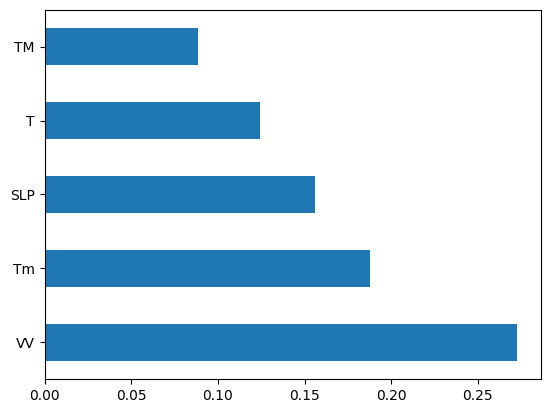

In [9]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In first we apply the machine learning lets just see for the referebce comparison

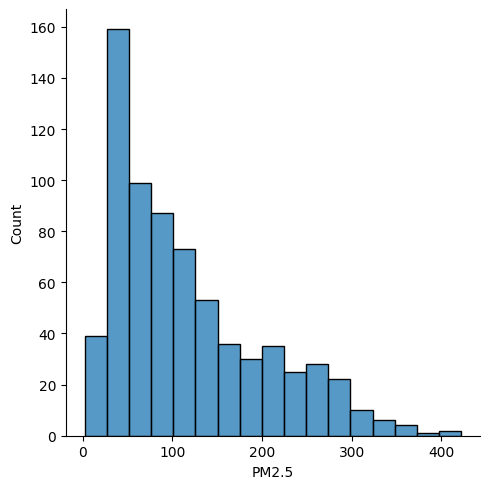

In [10]:
sns.displot(Y)

# Feature Scaling and Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Feature Scaling (After Splitting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Comparison Linear,Ridge and Lasso Regression

## Linear Regression

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [14]:
lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3497.6320184137294


## Ridge Regression

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Define parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge Regression Hyperparameter Tuning
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, Y_train)
best_ridge_alpha = ridge_cv.best_params_['alpha']

# Lasso Regression Hyperparameter Tuning
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train_scaled, Y_train)
best_lasso_alpha = lasso_cv.best_params_['alpha']

print("Best Ridge alpha:", best_ridge_alpha)
print("Best Lasso alpha:", best_lasso_alpha)

Best Ridge alpha: 10
Best Lasso alpha: 1


In [16]:
ridge_best = Ridge(alpha=best_ridge_alpha)
lasso_best = Lasso(alpha=best_lasso_alpha)

In [20]:
# Train Ridge and Lasso models before predicting
ridge_best.fit(X_train_scaled, Y_train)
lasso_best.fit(X_train_scaled, Y_train)

Lasso(alpha=1)

In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predictions from Ridge and Lasso models (using scaled test data)
ridge_predictions = ridge_best.predict(X_test_scaled)
lasso_predictions = lasso_best.predict(X_test_scaled)

# Calculate RMSE
ridge_rmse = np.sqrt(mean_squared_error(Y_test, ridge_predictions))
lasso_rmse = np.sqrt(mean_squared_error(Y_test, lasso_predictions))

print("Ridge RMSE:", ridge_rmse)
print("Lasso RMSE:", lasso_rmse)

Ridge RMSE: 51.013469366724046
Lasso RMSE: 50.93912099471276


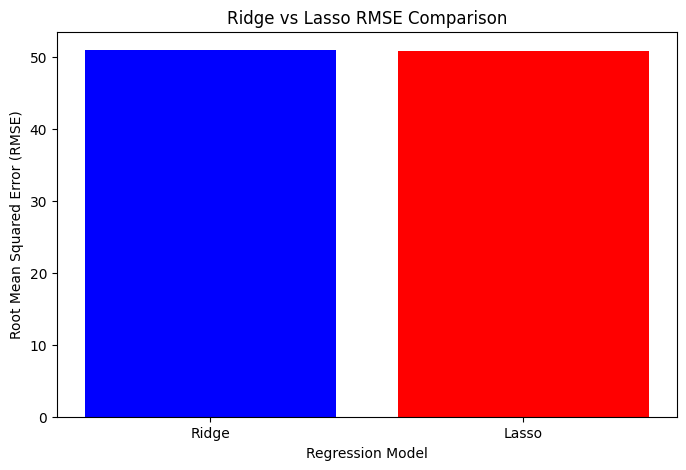

In [23]:
import matplotlib.pyplot as plt

# Comparing Ridge and Lasso Performance
models = ['Ridge', 'Lasso']
rmse_values = [ridge_rmse, lasso_rmse]

plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color=['blue', 'red'])
plt.xlabel("Regression Model")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Ridge vs Lasso RMSE Comparison")
plt.show()

In [24]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, Y_train)
elastic_rmse = np.sqrt(mean_squared_error(Y_test, elastic_net.predict(X_test_scaled)))
print("ElasticNet RMSE:", elastic_rmse)

ElasticNet RMSE: 51.20165921115862


In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]  # 1 means pure Lasso, 0 means pure Ridge
}
elastic_net = ElasticNet()
grid_search = GridSearchCV(elastic_net, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, Y_train)

best_elastic = grid_search.best_estimator_
best_elastic_rmse = np.sqrt(mean_squared_error(Y_test, best_elastic.predict(X_test_scaled)))

print("Best ElasticNet RMSE:", best_elastic_rmse)
print("Best Parameters:", grid_search.best_params_)

Best ElasticNet RMSE: 50.93912099471276
Best Parameters: {'alpha': 1, 'l1_ratio': 1}


## feature selection

In [26]:
# Get feature names
feature_names = X_train.columns

# Get coefficients from Lasso model
lasso_coefficients = lasso_best.coef_

# Identify non-zero coefficient features
selected_features = feature_names[lasso_coefficients != 0]

# Print removed features
removed_features = feature_names[lasso_coefficients == 0]
print("Removed Features:", removed_features.tolist())

# Create new datasets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Removed Features: ['T', 'TM']


## Retrain Lasso on Important Features

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Standardize the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Retrain Lasso
lasso_refit = Lasso(alpha=1)  # Use the best alpha found earlier
lasso_refit.fit(X_train_scaled, Y_train)

# Predictions
lasso_predictions = lasso_refit.predict(X_test_scaled)

# Calculate new RMSE
lasso_rmse = np.sqrt(mean_squared_error(Y_test, lasso_predictions))
print("Lasso RMSE after feature selection:", lasso_rmse)

Lasso RMSE after feature selection: 50.93883058998721


## Feature Engineering (Adding Polynomial Features)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree=2 to avoid too much complexity)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Retrain Lasso on polynomial features
lasso_poly = Lasso(alpha=1)
lasso_poly.fit(X_train_poly, Y_train)

# Predictions
lasso_poly_predictions = lasso_poly.predict(X_test_poly)

# Calculate RMSE
lasso_poly_rmse = np.sqrt(mean_squared_error(Y_test, lasso_poly_predictions))
print("Lasso RMSE after feature engineering:", lasso_poly_rmse)

Lasso RMSE after feature engineering: 51.367859543694905


c:\Users\misty\OneDrive\Desktop\Air-Quality-Prediction-main\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.730e+05, tolerance: 3.517e+02
  model = cd_fast.enet_coordinate_descent(


In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train ElasticNet with best parameters
elastic_model = ElasticNet(alpha=1, l1_ratio=1)  # Use best parameters found
elastic_model.fit(X_train_scaled, Y_train)

# Make Predictions
elastic_predictions = elastic_model.predict(X_test_scaled)

# Calculate RMSE
elastic_rmse = np.sqrt(mean_squared_error(Y_test, elastic_predictions))

# Calculate R² Score and MAE
elastic_r2 = r2_score(Y_test, elastic_predictions)
elastic_mae = mean_absolute_error(Y_test, elastic_predictions)

# Print Results
print(f"ElasticNet -> RMSE: {elastic_rmse:.4f}, R²: {elastic_r2:.4f}, MAE: {elastic_mae:.4f}")


ElasticNet -> RMSE: 50.9388, R²: 0.6185, MAE: 36.2047


In [31]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R2 Score
ridge_r2 = r2_score(Y_test, ridge_predictions)
lasso_r2 = r2_score(Y_test, lasso_predictions)
elastic_r2 = r2_score(Y_test, elastic_predictions)

# Calculate Mean Absolute Error (MAE)
ridge_mae = mean_absolute_error(Y_test, ridge_predictions)
lasso_mae = mean_absolute_error(Y_test, lasso_predictions)
elastic_mae = mean_absolute_error(Y_test, elastic_predictions)

# Print Results
print(f"Ridge -> RMSE: {ridge_rmse:.4f}, R²: {ridge_r2:.4f}, MAE: {ridge_mae:.4f}")
print(f"Lasso -> RMSE: {lasso_rmse:.4f}, R²: {lasso_r2:.4f}, MAE: {lasso_mae:.4f}")
print(f"ElasticNet -> RMSE: {elastic_rmse:.4f}, R²: {elastic_r2:.4f}, MAE: {elastic_mae:.4f}")

Ridge -> RMSE: 51.0135, R²: 0.6174, MAE: 36.4164
Lasso -> RMSE: 50.9388, R²: 0.6185, MAE: 36.2047
ElasticNet -> RMSE: 50.9388, R²: 0.6185, MAE: 36.2047


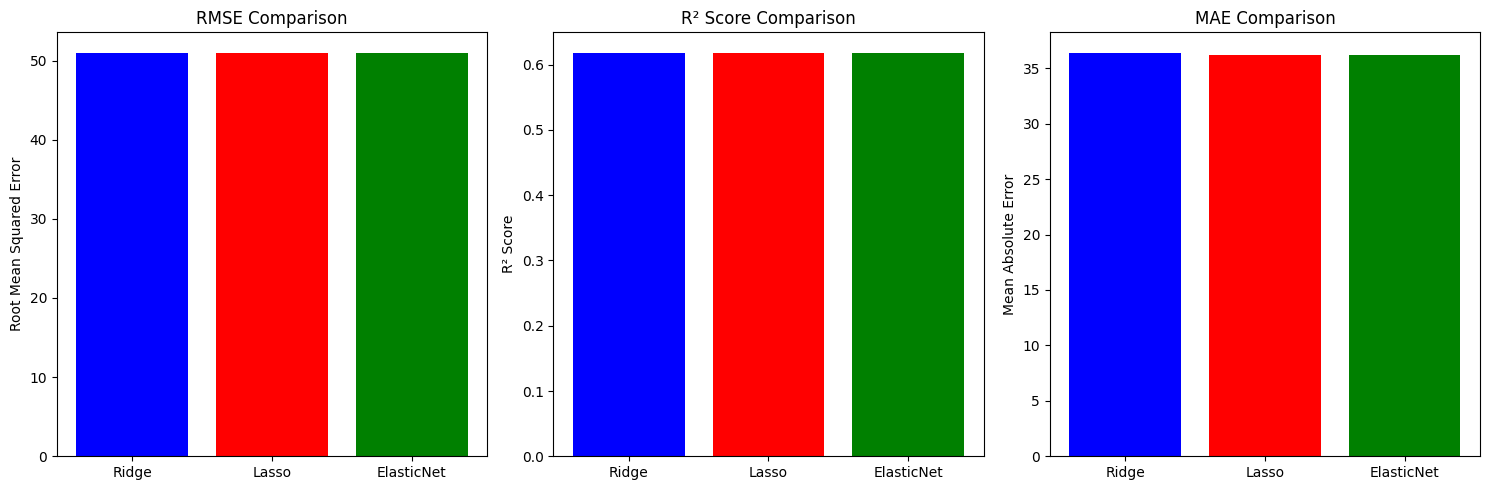

In [32]:
import matplotlib.pyplot as plt

models = ['Ridge', 'Lasso', 'ElasticNet']
rmse_values = [ridge_rmse, lasso_rmse, elastic_rmse]
r2_values = [ridge_r2, lasso_r2, elastic_r2]
mae_values = [ridge_mae, lasso_mae, elastic_mae]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# RMSE Comparison
axes[0].bar(models, rmse_values, color=['blue', 'red', 'green'])
axes[0].set_title("RMSE Comparison")
axes[0].set_ylabel("Root Mean Squared Error")

# R2 Score Comparison
axes[1].bar(models, r2_values, color=['blue', 'red', 'green'])
axes[1].set_title("R² Score Comparison")
axes[1].set_ylabel("R² Score")

# MAE Comparison
axes[2].bar(models, mae_values, color=['blue', 'red', 'green'])
axes[2].set_title("MAE Comparison")
axes[2].set_ylabel("Mean Absolute Error")

plt.tight_layout()
plt.show()


In [87]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [88]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [90]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-3354.617157307126


## Lasso Regression

In [91]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [92]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,Y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 900776.9343945177, tolerance: 424.6893591679955
  model = cd_fast.enet_coordinate_descent(
/Users/anil/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 811011.9882575938, tolerance: 387.0578859777605
  model = cd_fast.enet_coordinate_descent(
/Users/anil/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 894478.7604733068, tolerance: 411.01572370583324
  model = cd_fast.enet_coordinate_descent(
/Users/anil/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

{'alpha': 5}
-3356.4102569706833


In [93]:
print("Linear Regresion :" ,mean_mse)
print("Ridge Regression :", ridge_regressor.best_score_)
print("Lass Regression  :",lasso_regressor.best_score_)

Linear Regresion : -3499.3561872902073
Ridge Regression : -3354.617157307126
Lass Regression  : -3356.4102569706833


## Model Evaluation

Ridge Regression

In [116]:
prediction = ridge_regressor.predict(X_test)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

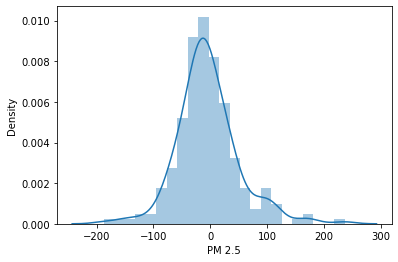

In [117]:
sns.distplot(Y_test-prediction)

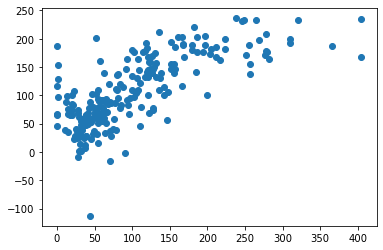

In [103]:
plt.scatter(Y_test,prediction)

Lass Regression

In [119]:
prediction = lasso_regressor.predict(X_test)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

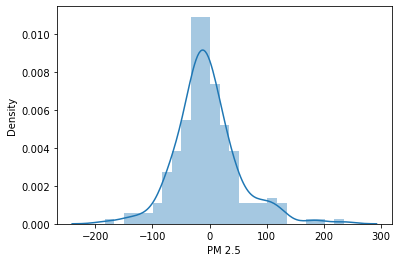

In [120]:
sns.distplot(Y_test-prediction)

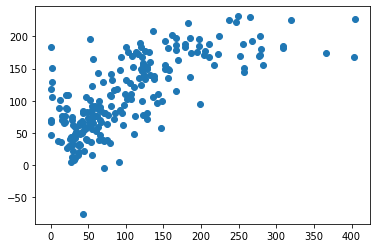

In [107]:
plt.scatter(Y_test,prediction)

Based on that Ridge is Better than the other two models

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [108]:
from sklearn import metrics

For Lasso Regression

In [121]:
print('Lasso Regression MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('Lasso Regression MSE:', metrics.mean_squared_error(Y_test, prediction))
print('Lasso Regression RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

Lasso Regression MAE: 40.15696946997223
Lasso Regression MSE: 3103.265102660339
Lasso Regression RMSE: 55.70695739905689


For Ridge Regression

In [118]:
print('Ridge Regression MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('Ridge Regression MSE:', metrics.mean_squared_error(Y_test, prediction))
print('Ridge Regression RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

Ridge Regression MAE: 39.69425975673827
Ridge Regression MSE: 3026.4268723629525
Ridge Regression RMSE: 55.01297003764615


In [122]:
import pickle 

In [124]:
# open a file, where you ant to store the data
file = open('ridge_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)